<a href="https://colab.research.google.com/github/vinnymurphy/covid/blob/master/notebook/states_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.5, 1.0, 'Percent Death')

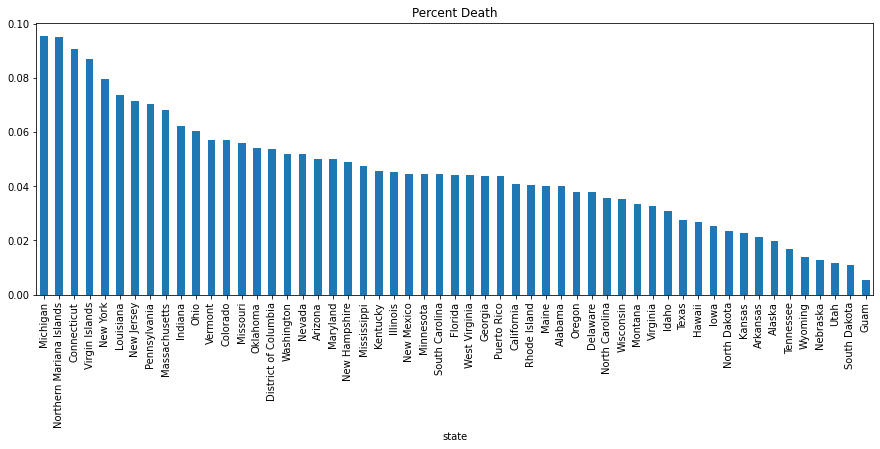

In [7]:
import pandas as pd
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'


states = pd.read_csv(url)
state_total = states.groupby('state').max()
state_total = state_total.drop(columns=['fips'])
state_total['percent'] = state_total['deaths'] / state_total['cases']
state_total.sort_values(by='percent', inplace=True, ascending=False)
fig = state_total['percent'].plot(kind='bar')
fig.set_title('Percent Death')


In [8]:
state_total.head(11)

,date,cases,deaths,percent
state,,,,
Michigan,2020-05-20,52988,5060,0.095493
Northern Mariana Islands,2020-05-20,21,2,0.095238
Connecticut,2020-05-20,39017,3529,0.090448
Virgin Islands,2020-05-20,69,6,0.086957
New York,2020-05-20,359235,28540,0.079447
Louisiana,2020-05-20,35439,2608,0.073591
New Jersey,2020-05-20,150399,10747,0.071457
Pennsylvania,2020-05-20,68151,4794,0.070344
Massachusetts,2020-05-20,88970,6066,0.068180


In [9]:

url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
counties = pd.read_csv(url)
mass = counties[counties['state'] == 'Massachusetts']
mass = mass.drop(columns=['fips'])
mass['percent'] = mass['deaths'] / mass['cases'] 
mass.tail(15).T





,160150,160151,160152,160153,160154,160155,160156,160157,160158,160159,160160,160161,160162,160163,160164
date,2020-05-20,2020-05-20,2020-05-20,2020-05-20,2020-05-20,2020-05-20,2020-05-20,2020-05-20,2020-05-20,2020-05-20,2020-05-20,2020-05-20,2020-05-20,2020-05-20,2020-05-20
county,Barnstable,Berkshire,Bristol,Dukes,Essex,Franklin,Hampden,Hampshire,Middlesex,Nantucket,Norfolk,Plymouth,Suffolk,Unknown,Worcester
state,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Massachusetts
cases,1197,500,6165,26,12920,309,5418,792,19708,12,7607,7280,16962,294,9780
deaths,98,37,338,1,817,46,526,76,1462,0,749,481,807,3,625
percent,0.0818713,0.074,0.0548256,0.0384615,0.0632353,0.148867,0.0970838,0.0959596,0.0741831,0,0.0984619,0.0660714,0.0475769,0.0102041,0.0639059


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plt.rcParams['figure.figsize'] = [15, 5]
from IPython import display
from ipywidgets import interact, widgets

def county_info(name, column):
  return mass[mass['county'] == name][column]

In [13]:
def dod_county(name):
    '''Give the day over day results'''
    df = mass[mass['county'] == name]
    increase = [y - x for x,y in zip(df['cases'], df['cases'][1:])]
    days = df['date'][1:]
    df = pd.DataFrame(data=dict(increase=increase, date=days))
    fig = px.line(df, x=df['date'], y=df['increase'], title='{0} Increase Day Over Day'.format(name))
    return fig.show()

# for names in sorted(['Rhode Island','Colorado', 'Massachusetts', 'Florida', 'Maryland', 'Georgia']):
#dod_state(names)

counties = ['Bristol', 'Unknown', 'Plymouth', 'Middlesex', 'Barnstable', 'Worcester', 'Essex', 'Suffolk']
for county in sorted(counties):
    dod_county(county)
    

In [12]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

titles = ('Bristol', 'Unknown', 'Plymouth', 'Middlesex', 'Barnstable', 'Worcester', 'Essex', 'Suffolk')
# Suffolk	Unknown	Worcester
fig = make_subplots(rows=4, cols=2,
                    subplot_titles=titles) 

fig.append_trace(go.Scatter(
    x=county_info('Bristol', 'date'),
    y=county_info('Bristol', 'cases'),
    mode='lines+markers',
    name='Bristol',

), row=1, col=1)
fig.append_trace(go.Scatter(
    x=county_info('Unknown', 'date'),
    y=county_info('Unknown', 'cases'),
    mode='lines+markers',
    name='Unknown',

), row=1, col=2)


fig.append_trace(go.Scatter(
    x=county_info('Plymouth', 'date'),
    y=county_info('Plymouth', 'cases'),
    mode='lines+markers',
    name='Plymouth',

), row=2, col=1)

fig.append_trace(go.Scatter(
    x=county_info('Middlesex', 'date'),
    y=county_info('Middlesex', 'cases'),
    mode='lines+markers',
    name='Middlesex',

), row=2, col=2)


fig.append_trace(go.Scatter(
    x=county_info('Barnstable', 'date'),
    y=county_info('Barnstable', 'cases'),
    mode='lines+markers',
    name='Barnstable',
), row=3, col=1)

fig.append_trace(go.Scatter(
    x=county_info('Worcester', 'date'),
    y=county_info('Worcester', 'cases'),
    mode='lines+markers',
    name='Worcester',
), row=3, col=2)

fig.append_trace(go.Scatter(
    x=county_info('Essex', 'date'),
    y=county_info('Essex', 'cases'),
    mode='lines+markers',
    name='Essex',
), row=4, col=1)

fig.append_trace(go.Scatter(
    x=county_info('Suffolk', 'date'),
    y=county_info('Suffolk', 'cases'),
    mode='lines+markers',
    name='Suffolk',
), row=4, col=2)
fig.update_layout(height=600, width=600, title_text="County Cases")
fig.show()